<a href="https://colab.research.google.com/github/mairabermeo/Data-Science/blob/master/Proj_1_Maira_Jannat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Early Onset Prediction of Diabetes Mellatus in Pima Women**

**By:**

**Jannat Lily**

**Maira Bermeo**

Diabetes Mellatus is a chronic metabolic disorder characterized by persistently high blood sugar levels and insulin resistance. If left untreated, it can lead to serious complications such as eye disease, kidney damage, heart disease, nerve problems, and an increase rate of overall infections.

The diagnosis of Diabetes involves blood testing and may span a few months to allow for testing the patient's A1C levels. This process can provide real life complications because if Diabetes is detected early enough, the patient may still be in the pre-Diabetic stage where the disorder can easily be reversed with simple lifstyle changes such as a better diet and increased exercise. Once the disorder has progressed to an offical diagnosis of Diabetes Mellatus however, it becomes chronic and puts the patient at a lifetime increased risk of other complications.

We can use Machine Modeling to bridge the gap between early detection and the complication and delay in medical diagnosis. This project aims to develop a predictive model to identify individuals at high risk of having diabetes using their medical history of clinical and demographic features. We will use machine learning classification methods to assess how accurately routine health metrics can estimate a patient's diabetic status.

https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data

##**Data Summary**



To create our model, will use the Pima Indian Diabetes Dataset by the National Institute of Diabetes and Digestive and Kidney Diseases. This data includes information about 768 female patients, aged 21 and older, of Pima Indian heritage and located in Arizona, U.S.

The target variable, Outcome, indicates whether the patient was diagnosed with diabetes based on oral glucose tolerance test results.

- **Outcome**: 0 = Non-diabetic, 1 = Diabetic

The independent variables consists of several medical predictors for Diabetes, as follows:  

- **Pregnancies**: Number of times the patient has been pregnant
  - Gestational diabetes is a known risk factor

- **Glucose**: Plasma glucose concentration (mg/dL)
  - Central diagnostic marker for diabetes (elevated levels indicate insulin resistance)
  - Pre Diabetes: 100 - 125 mg/dL
  - Diabetes: 126 mg/dL and above  

- **BloodPressure**: Diastolic blood pressure (mm Hg)
  - Hypertension often co-occurs with diabetes
  - The upper limit for normal blood pressure is 130/20 mm Hg

- **SkinThickness**: Triceps skin fold thickness (mm)
  - Used to estimate body fat composition
  - Normal range for Adult Women: 18 - 25 mm
  - Obese range for Adult Women: 25+ mm

- **Insulin**: 2-hour serum insulin (μU/mL)
  - Marker of insulin resistance and beta-cell function
  - Normal Range: 16 - 166 μU/mL

- **BMI**: Body Mass Index (kg/m²)
  - Strongly associated with obesity-related diabetes
  - Obesity marked at >30 kg/m²

- **DiabetesPedigreeFunction**: Genetic predisposition score
  - Estimates family history risk
  - Normal: 0.00 - 1.00
  - Elevated Famial Risk: >1.00

- **Age**: Patient age (years)
  - Risk increases with age

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(style="whitegrid", context="talk")

#import data
URL = "https://raw.githubusercontent.com/mairabermeo/Data-Science/master/Data/diabetes.csv"
df  = pd.read_csv(URL)

#Basic shape & preview
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#List Column Names
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
#Info on DataFrame
print("Shape:", df.shape)
df.info(show_counts=True)

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Check for Null Values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#Check for Missing Values (Zero Values) in Diagnostics
zero_counts = (df == 0).sum()
print(zero_counts, "\n")

zero_suspects = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_table    = ((df[zero_suspects] == 0).sum()
                 .to_frame("# zeros")
                 .assign(pct = lambda x: 100*x['# zeros']/len(df)))
zero_table


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64 



,# zeros,pct
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292


These results show we 0's in the following medical attributes
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

These values can not be 0, therefore they likely indicate missing values. They should be converted to NaN and imputed in the data cleaning phase.

##**Exploratory Data Analysis**

###**Statistics**

In [ ]:
#Descriptive statistics
display(df.describe().T.style.format("{:.2f}"))


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


- 35% of the population has diabetes, while 65% does not. The population of non diabetics make up the majority class in this data set, which could potentially skew our model in favor of them.
- Average Age is 33.24, with a wide range of 21.0 to 81.00. Splitting up Age by groups with feature engineering would help us identify more accurately how age effects diabetes incidence.
- Number of Pregnancies also ranges widely from no pregnancy to 17 pregnancies. In terms of health, the difference between these two realities is vast and could significantly effect diabetes prevalence.
- Similarly, the relatively small numeric scale BMI does not accurately reflect the medical reality of how BMI impacts the development of Diabetes. Therefor, we may benefit by feature engineering this variable.

In [ ]:
# Mean values of each feature grouped by Outcome
grouped = df.groupby('Outcome').mean().T
grouped.columns = ['Non-Diabetic', 'Diabetic']
grouped.style.format("{:.2f}")


,Non-Diabetic,Diabetic
Pregnancies,3.30,4.87
Glucose,109.98,141.26
BloodPressure,68.18,70.82
SkinThickness,19.66,22.16
Insulin,68.79,100.34
BMI,30.30,35.14
DiabetesPedigreeFunction,0.43,0.55
Age,31.19,37.07


Glucose and Insulin levels are understandably the biggest indicators that seperates non-Diabetic from Diabetic patients, as they are markers of the disorder.

We could create a model that excludes these indicators, so that the model can be used on patients who have never had their blood glucose or insulin levels tested. But realistically, if a patient has been to a doctor's office, then they likely have had at least one blood test done in their life. Most blood tests do test for Glucose and Insulin levels.

It does not make sense to exclude these attributes from our model if they exist in the patient's medical history. Therefore, we will include them.    

In [ ]:
# IQR and std for each numeric feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
stds = df.std()

iqr_std_table = pd.DataFrame({
    'IQR': IQR,
    'Standard Deviation': stds
}).style.format("{:.2f}")
iqr_std_table


,IQR,Standard Deviation
Pregnancies,5.00,3.37
Glucose,41.25,31.97
BloodPressure,18.00,19.36
SkinThickness,32.00,15.95
Insulin,127.25,115.24
BMI,9.30,7.88
DiabetesPedigreeFunction,0.38,0.33
Age,17.00,11.76
Outcome,1.00,0.48


- Insulin and Glucose exhibit the largest spread (IQR > 100), with standard deviations exceeding 150, suggesting a high potential for outliers. But as stated above, this is to be expected given the nature of the disease. We will address the problem if needed, but leave it as is for now.

- Age, BMI, and Pregnancies are tightly clustered and therfore underline our need to engineer them further.

In [ ]:
# Skewness and kurtosis
df.skew().to_frame("Skewness").join(df.kurtosis().to_frame("Kurtosis")).style.format("{:.2f}")


,Skewness,Kurtosis
Pregnancies,0.90,0.16
Glucose,0.17,0.64
BloodPressure,-1.84,5.18
SkinThickness,0.11,-0.52
Insulin,2.27,7.21
BMI,-0.43,3.29
DiabetesPedigreeFunction,1.92,5.59
Age,1.13,0.64
Outcome,0.64,-1.60


- Blood pressure and BMI are left skewed, while PedigreeFunction, Age, Insulin, and Pregnancies are right skewed. Outliers in these fields may affect the effectiveness of our logistic regression.

- PedigreeFunction, Blood Pressure, and Insulin have particularly high kurtosis, which may also negatively affect our results. A tree model would work better for us in that case.  

###**Futher Analysis with Visualization**

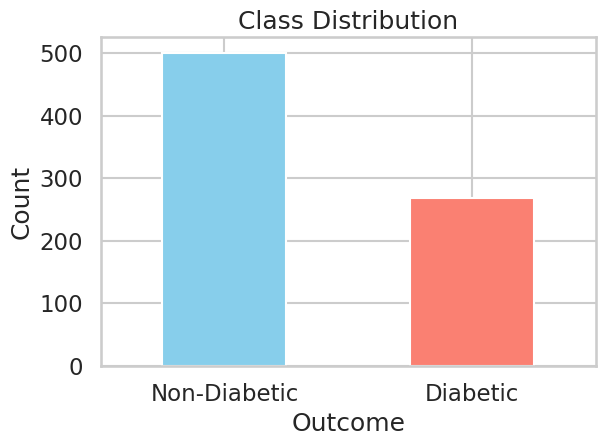

In [ ]:
# Class balance
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'], rotation=0)
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This bar plot shows the number of patients diagnosed with diabetes (Outcome = 1) versus those who are not (Outcome = 0).

Approximately 35% of the records are diabetic cases, which is a class imbalance that we will need to account for during modeling.

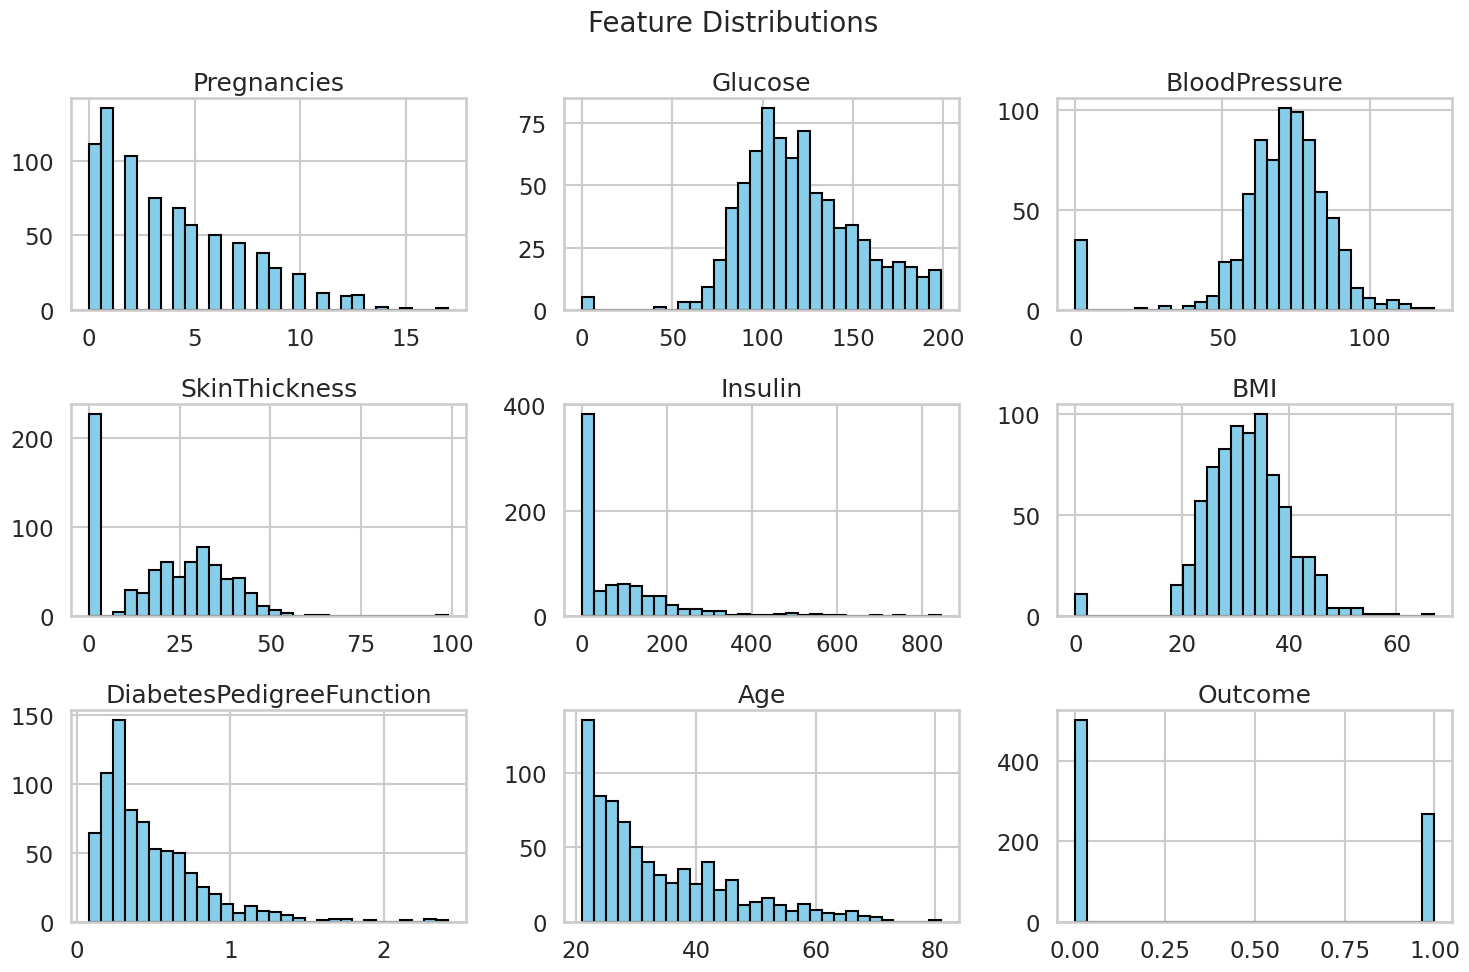

In [ ]:
# Distribution plots
df.hist(figsize=(15, 10), bins=30, color="skyblue", edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()


- Glucose and Insulin show strong right skew, indicating potential outliers and the need for transformation or normalization.

- BMI and Age are also mildly skewed, but manageable with standard scaling or binning.

- Pregnancies and Outcome are both discrete, so their spiky distributions are to be expected.


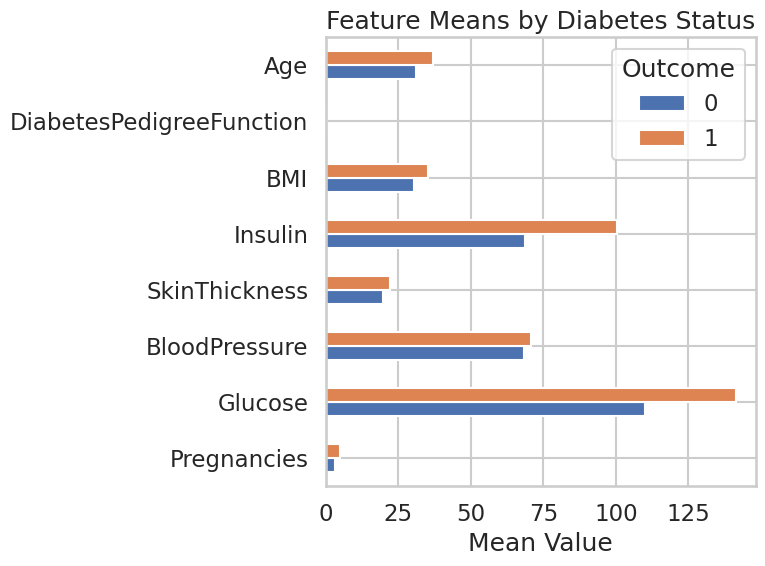

In [ ]:
# Average feature values by Outcome
means = df.groupby('Outcome').mean().T
means.plot(kind='barh', figsize=(8, 6))
plt.title("Feature Means by Diabetes Status")
plt.xlabel("Mean Value")
plt.tight_layout()
plt.show()


Outcome 0 (blue) reflects non-Diabetics and Outcome 1 (orange) reflects Diabetics.

Other then the expected variation in Glucose and Insulin, BMI and Age seem to be the biggest seperating factor between the two groups. This again validates our decison to further feature engineer these variables, to increase their predictive value.

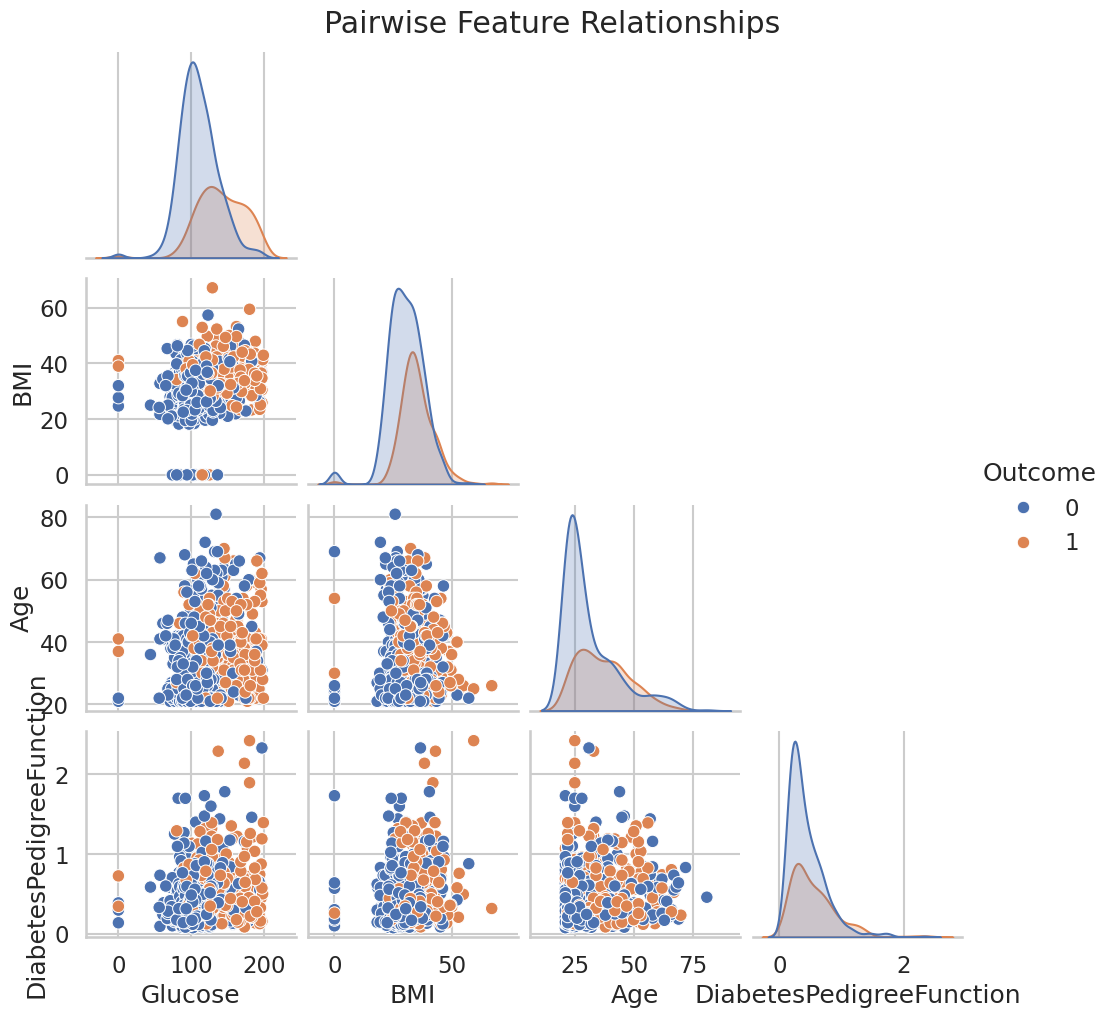

In [ ]:
# Pairplot for selected features
selected = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(df[selected], hue='Outcome', corner=True, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


This pairplot visualizes pairwise relationships among key features like Glucose, BMI, Age, and Pedigree Function.

- Patients with diabetes tend to cluster at higher  BMI values, supporting its predictive strength.

- Older individuals also tend to have a higher BMI, so Age is a strong predictive factor.

- Although Diabetes has a strong genetic component in reality, these plots show that there is not as much of a clear boundary between Diabetics and non-Diabetics when it comes to PedigreeFunction. For this reason, we will not put as much emphasis in this feature when we build our model.

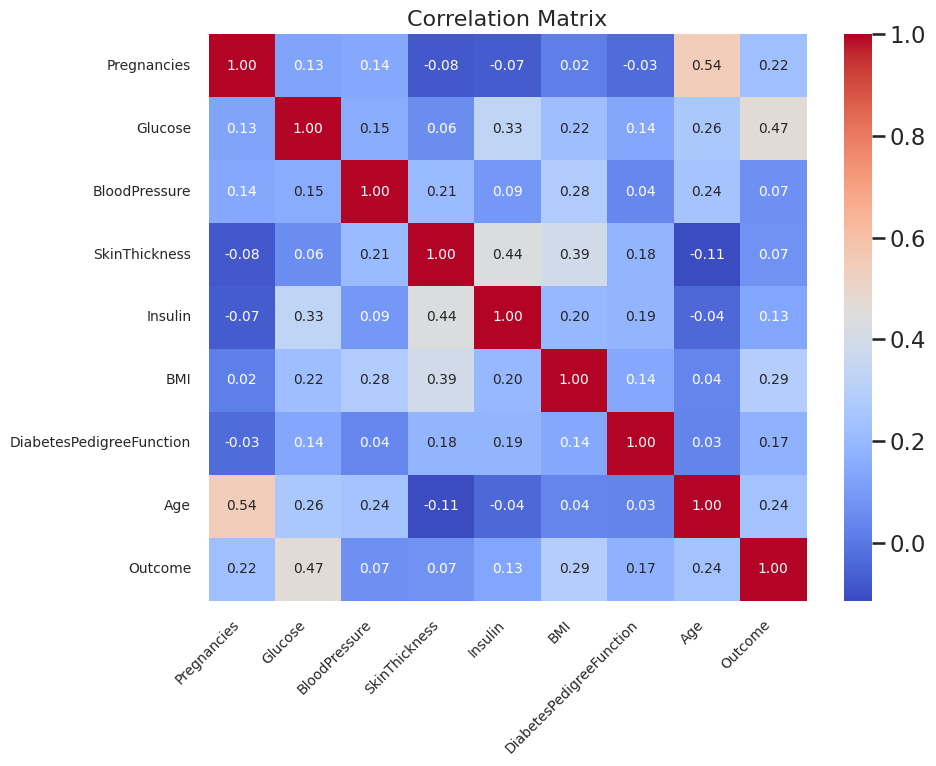

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            annot_kws={'size': 10})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Glucose is most strongly correlated with diabetes outcome, as expected.

BMI, Age, Genetic Predisposition, and Number of Pregnancies are morst highly correlated with Diabetes Outcome outside of Glucose.
* Glucose: 0.47
* BMI: 0.29
* Age: 0.24
* Pregnancies: 0.22


Skin Thickness and Blood Pressure are also positively correlated with Outcome, but not as severely.
*   BloodPressure 0.07
*   SkinThickness 0.07

There is minimal multicollinearity overall, which is beneficial for modeling.

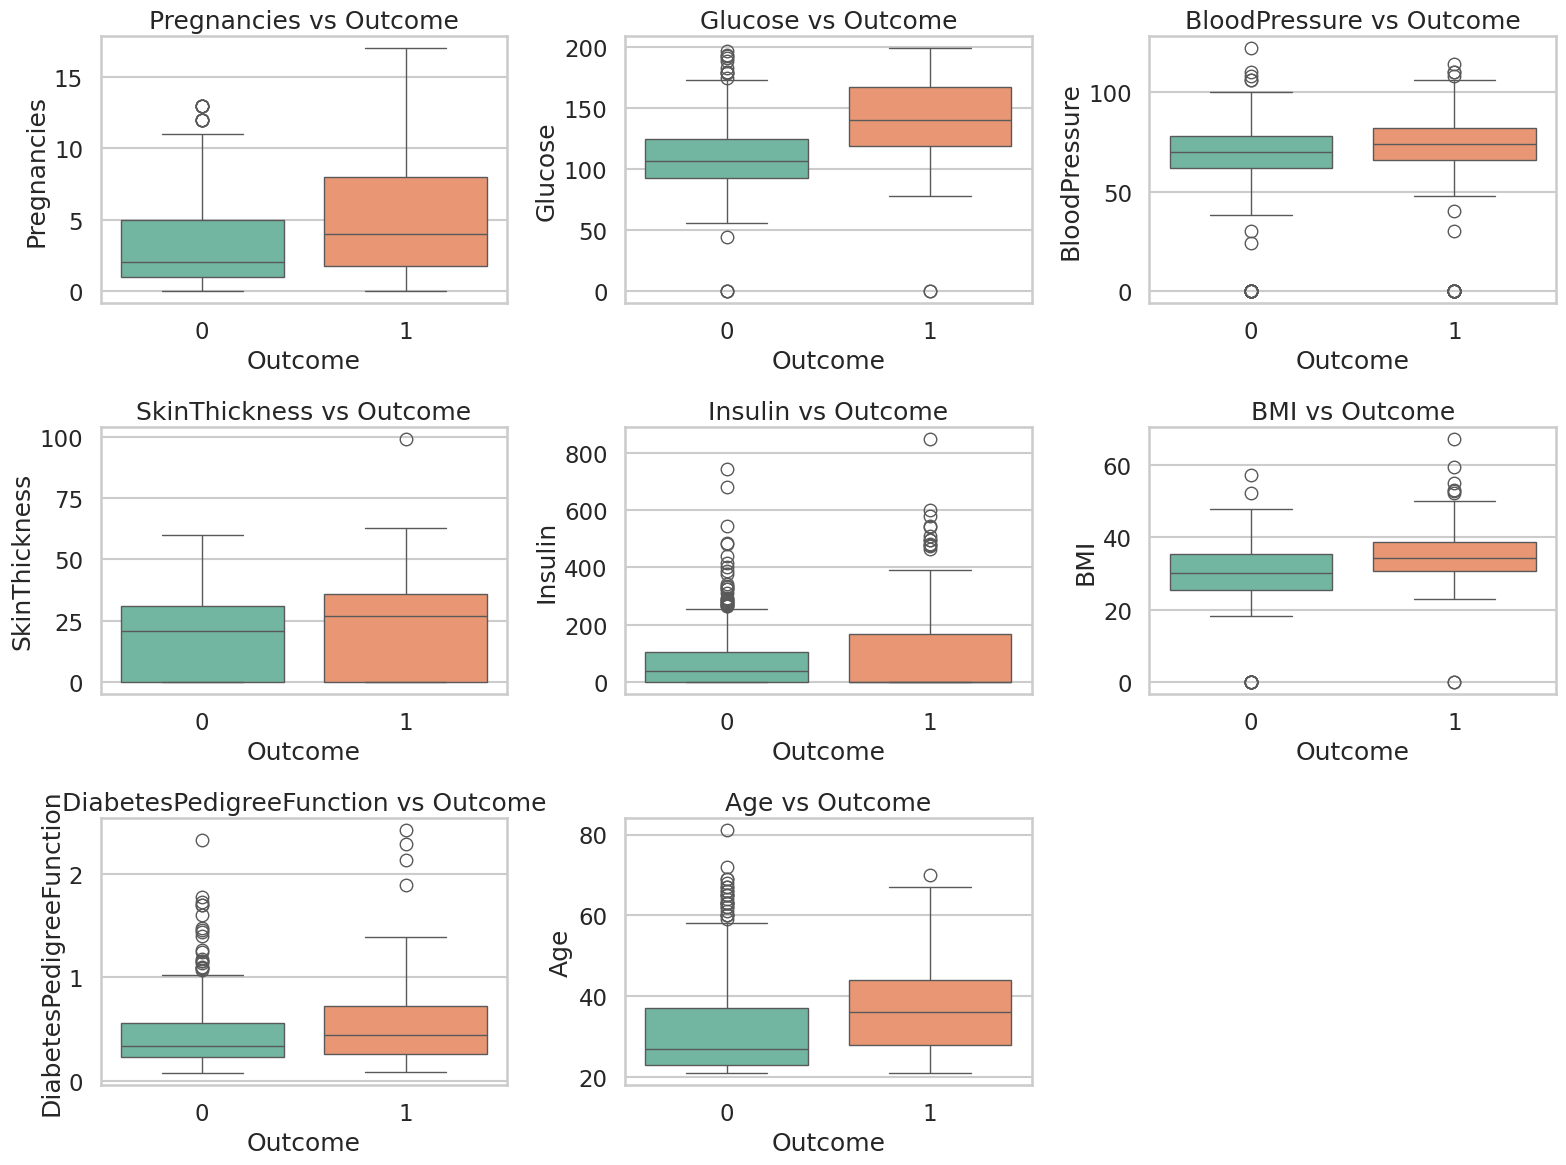

In [ ]:
import warnings

#Boxplots to show outlieres
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(df.columns[:-1], 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
        plt.title(f'{col} vs Outcome')
    plt.tight_layout()
    plt.show()


- Glucose, Age, and BMI are noticeably higher in diabetic patients.  

- Insulin and SkinThickness have the most outliers, which may negatively affect our model. However, these attributes are both highly affected by the disease itself, particularly in patients who have had Diabetes for many years. We may want to test our model without scaling them, in case scaling affects their predictive power.

##**Feature Engineering**

We will:
- Keep all 8 features for better predictions
- Impute zero values in clinical catergories using:
  - median imputation
  - knn imputation
  - iterative regressive imputation
- Create features
  - BMI Catergory
  - Pregnancy Rate
  - Glucose Resistance: Insulin to Glucose
  - Age Bins, to group Patients by Age (20s, 30s, 40s, etc)

###**Imputing Clinical Zero Values**

In [ ]:
import numpy as np

# List of columns where 0 is not valid and should be treated as missing
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

# Check how many missing values we now have
df[invalid_zero_cols].isnull().sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [ ]:
#check for zero values
df[invalid_zero_cols].eq(0).sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


We have replaced all 0 values in the following clinical features with NaN, since zero is biologically implausible:

- Glucose (blood sugar)
- BloodPressure
- SkinThickness
- Insulin
- BMI

These missing values will be imputed using three different strategies in the next steps.

####**I - Median Imputation**

In [ ]:
# Create a copy of the dataset for this imputation method
df_median = df.copy()

# Fill missing values with the median of each column
df_median[invalid_zero_cols] = df_median[invalid_zero_cols].fillna(df_median[invalid_zero_cols].median())

# Confirm no missing values remain
df_median[invalid_zero_cols].isnull().sum()


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


We have sucessfully filled missing values in the clinical features. The median is a robust measure of central tendency that is not sensitive to outliers, making it a good choice for this model.

This version of the dataset **df_median** will be used in one of our model training pipelines.


####**II - KNN Imputation**

In [ ]:
from sklearn.impute import KNNImputer

# Create a new copy of the cleaned dataset
df_knn = df.copy()

# KNN Imputer requires all numeric values — drop non-numeric if necessary (not needed here)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to numeric columns
df_knn[df_knn.columns] = knn_imputer.fit_transform(df_knn)

# Check for remaining missing values
df_knn.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


This imputation method uses the k-nearest neighbors algorithm (where k = 5) to fill in missing values by looking at the 5 most similar patients.  

It considers multivariate relationships between features like BMI, Glucose, and Age, allowing more context based replacements.

We store this version of the dataset as **df_knn** for later modeling.


####**III - Iterative Imputation**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Copy of dataset
df_iter = df.copy()

# Initialize and apply the Iterative Imputer
iter_imputer = IterativeImputer(random_state=0)
df_iter[df_iter.columns] = iter_imputer.fit_transform(df_iter)

# Confirm missing values are gone
df_iter.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


We have successfully used the IterativeImputer, which models each feature with missing values as a function of the other features.  

This multivariate method can capture complex interactions and may be more accurate than the other two in imputing accurate medical data.

We store this cleaned dataset as **df_iter** and will compare it with KNN and median versions.


####**Testing Distrubutions of Imputed Data**

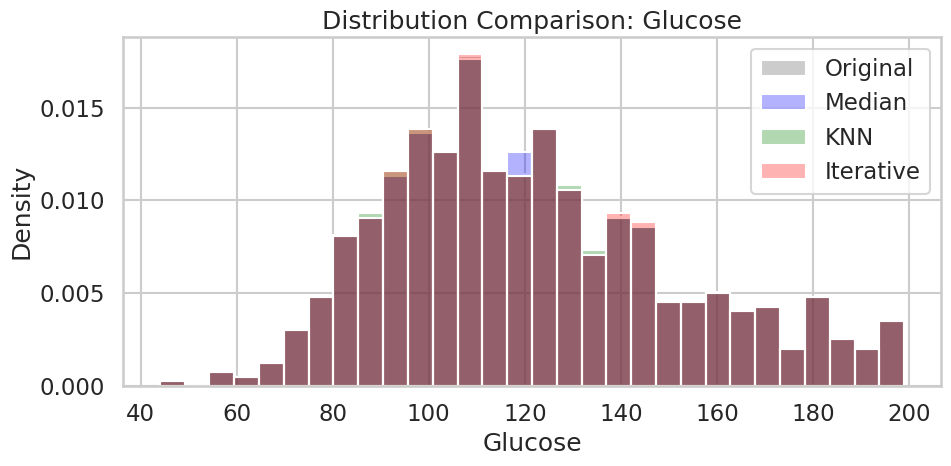

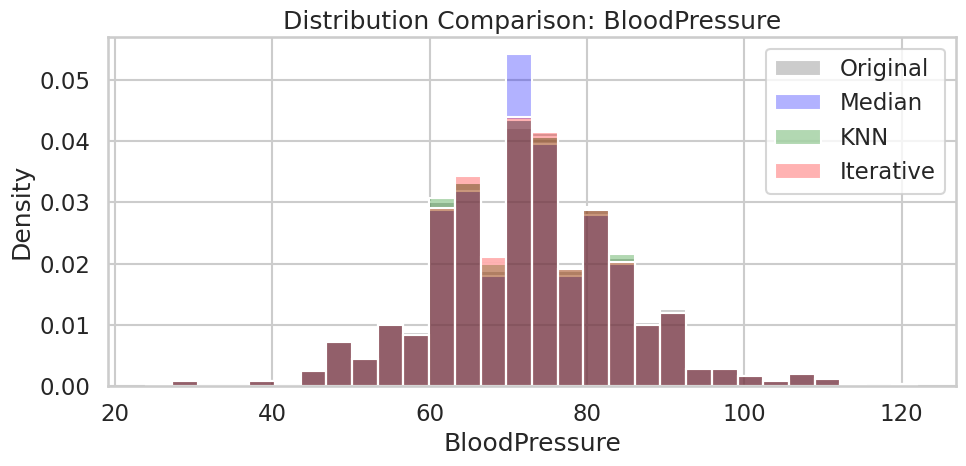

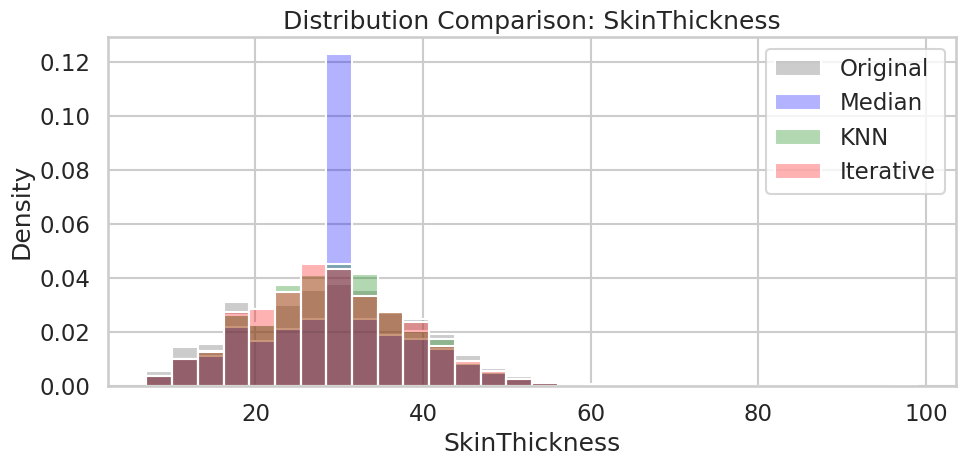

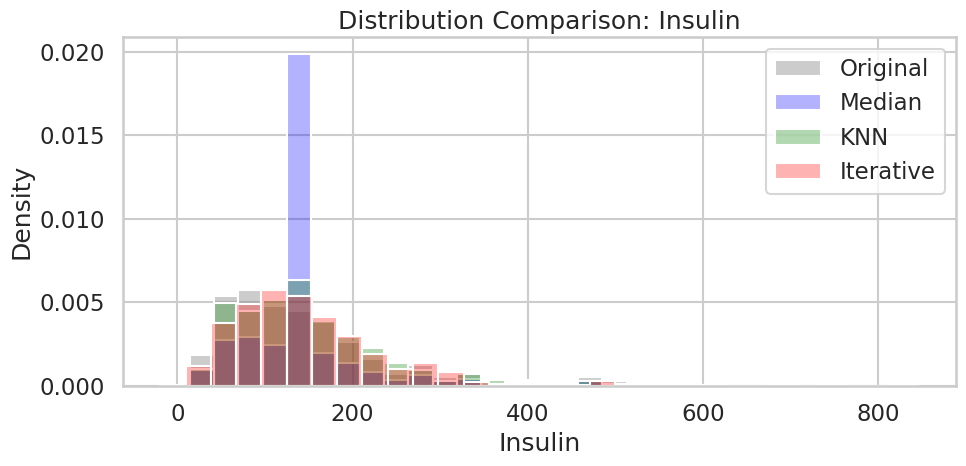

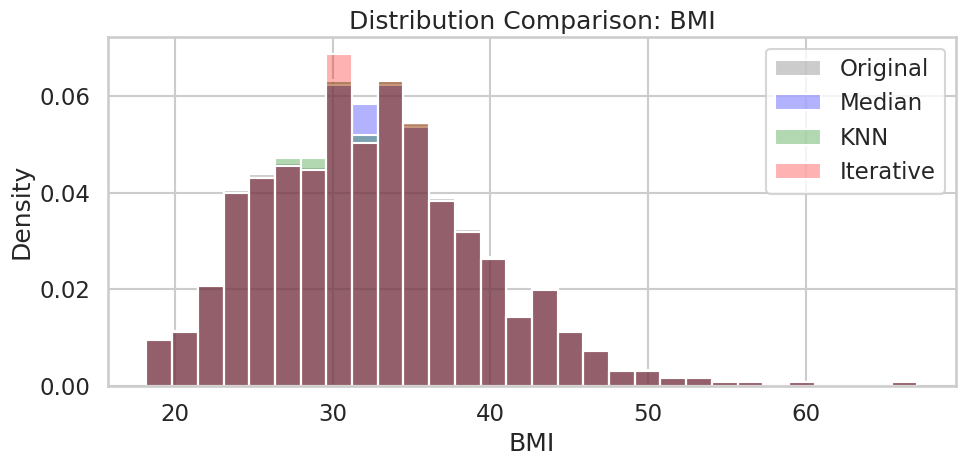

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean, professional Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Colors for each imputation method
colors = {'Original': 'gray', 'Median': 'blue', 'KNN': 'green', 'Iterative': 'red'}

# List of columns that were imputed
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Plot distributions for each imputed feature
for col in invalid_zero_cols:
    plt.figure(figsize=(10, 5))

    # Original (non-missing only)
    sns.histplot(df[col].dropna(), kde=False, stat='density', color=colors['Original'], label='Original', bins=30, alpha=0.4)

    # Median imputed
    sns.histplot(df_median[col], kde=False, stat='density', color=colors['Median'], label='Median', bins=30, alpha=0.3)

    # KNN imputed
    sns.histplot(df_knn[col], kde=False, stat='density', color=colors['KNN'], label='KNN', bins=30, alpha=0.3)

    # Iterative imputed
    sns.histplot(df_iter[col], kde=False, stat='density', color=colors['Iterative'], label='Iterative', bins=30, alpha=0.3)

    # Labels and legend
    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


Each plot shows the distribution of a clinical feature across four versions of the dataset:
- **Original** (gray): the actual values, excluding missing (NaN) records
- **Median** (blue): after median imputation
- **KNN** (green): after k-nearest neighbors imputation
- **Iterative** (red): after multivariate regression-based imputation

We can see that the imputed values don’t distort the original distribution. But there are some artificial spikes, particularly with median imputation and iterative imputation.

Based on this, KNN imputation may be the most reliable.

We'll proceed feature engineering with only the **df_knn** dataset and reevaluate later if needed.


###**Feature Engineering**

####**Add Features**

In [ ]:
# Copy dataset to avoid overwriting original
df_fe = df_knn.copy()

# 1. BMI Category (clinical ranges)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_fe['BMI_Category'] = df_fe['BMI'].apply(bmi_category)

# 2. Pregnancy Rate
df_fe['Pregnancy_Rate'] = df_fe['Pregnancies'] / df_fe['Age']

# 3. Insulin-to-Glucose Ratio
df_fe['Insulin_Glucose_Ratio'] = df_fe['Insulin'] / df_fe['Glucose']

# 4. Age Group
age_bins = [20, 30, 40, 50, 60, 100]
age_labels = ['20s', '30s', '40s', '50s', '60+']
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=age_bins, labels=age_labels, right=False)

# Preview new columns
df_fe[['BMI', 'BMI_Category', 'Pregnancy_Rate', 'Insulin_Glucose_Ratio', 'Age', 'Age_Group']].head()


,BMI,BMI_Category,Pregnancy_Rate,Insulin_Glucose_Ratio,Age,Age_Group
0,33.6,Obese,0.120000,1.141892,50.0,50s
1,26.6,Overweight,0.032258,0.689412,31.0,30s
2,23.3,Normal,0.250000,0.899454,32.0,30s
3,28.1,Overweight,0.047619,1.056180,21.0,20s
4,43.1,Obese,0.000000,1.226277,33.0,30s


We added the following new features to enrich the dataset and capture additional patterns:

- **BMI_Category**: Categorizes patients based on clinical body fat thresholds (e.g., Obese = BMI ≥ 30).
- **Pregnancy_Rate**: Normalizes number of pregnancies by age, giving context to childbearing frequency.
- **Insulin_Glucose_Ratio**: An indicator of insulin sensitivity where low ratios may suggest insulin resistance.
- **Age_Group** : Buckets patients into age bands, potentially improving model generalization.

####**Evaluate Usefulness of New Numeric Features**

In [ ]:
# Pearson correlation with Outcome (for numeric engineered features)
numeric_engineered = ['Pregnancy_Rate', 'Insulin_Glucose_Ratio']
correlations = df_fe[numeric_engineered + ['Outcome']].corr()['Outcome'].drop('Outcome')

# Display as a nice table
correlations.to_frame('Pearson Correlation with Outcome').style.format("{:.3f}")


,Pearson Correlation with Outcome
Pregnancy_Rate,0.164
Insulin_Glucose_Ratio,0.193


These are low to moderate correlations to the Outcome, so we can use them.

####**Evaluate Usefulness of New Categorical Features**

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(feature):
    contingency_table = pd.crosstab(df_fe[feature], df_fe['Outcome'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return pd.Series({'Chi2': chi2, 'p-value': p})

# Apply to each categorical feature
categorical_features = ['BMI_Category', 'Age_Group']
chi_results = pd.DataFrame({feature: chi_square_test(feature) for feature in categorical_features}).T
chi_results


,Chi2,p-value
BMI_Category,77.088899,1.292178e-16
Age_Group,78.879917,3.007837e-16


Chi Sqaure results indicate that the new features are meaningful to the target and low P-values indicate statistical significance.

We will proceed with both of these additional features.

####**One Hot Encoding of New Categorical Features**

In [ ]:
# Confirm these are the only categorical columns needing encoding
categorical_cols = ['BMI_Category', 'Age_Group']

# One-hot encode them (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

# Preview the new columns
df_encoded.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_Rate,Insulin_Glucose_Ratio,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60+
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0,0.120000,1.141892,True,False,False,False,False,True,False
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0,0.032258,0.689412,False,True,False,True,False,False,False
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0,0.250000,0.899454,False,False,False,True,False,False,False
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.047619,1.056180,False,True,False,False,False,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.000000,1.226277,True,False,False,True,False,False,False


In [ ]:
# Convert all bool columns to int (0/1)
df_encoded = df_encoded.astype({col: int for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})


In [ ]:
#verify one hot encoding
df_encoded[['BMI_Category_Overweight', 'BMI_Category_Obese',
            'Age_Group_30s', 'Age_Group_40s', 'Age_Group_50s', 'Age_Group_60+']].head(10)


,BMI_Category_Overweight,BMI_Category_Obese,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60+
0,0,1,0,0,1,0
1,1,0,1,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,1,1,0,0,0
5,1,0,1,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,1,0
9,0,1,0,0,1,0


We have encoded the categorical attributes from binary to numberic (1/0) to use them in tests later.

####**Variance Inflation Factor (VIF) to Detect Multiollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Drop target column
X = df_encoded.drop(columns=['Outcome'])

# Add constant (intercept) for statsmodels compatibility
X_const = add_constant(X)

# Create VIF DataFrame
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Drop the constant row from display
vif_data = vif_data[vif_data["Feature"] != "const"]
vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)


,Feature,VIF
0,Insulin,28.190824
1,Pregnancies,21.582965
2,Age,20.623109
3,Insulin_Glucose_Ratio,19.528358
4,Pregnancy_Rate,15.991761
5,Age_Group_60+,10.033327
6,Age_Group_50s,9.196260
7,Age_Group_40s,7.487062
8,Glucose,5.092085
9,BMI_Category_Obese,4.803919


Several Features have high VIF and logistic regression is sensitive to multicollinearity because it affects the stability and interpretability of coefficients.

However, our model is more concerned about accurately predicting if a patient has Diabetes at all. We are not as concerned about which features (which risk factors) contribute the most to the patient developing the illness.

For this reason, we will keep all current features because the additional features may help us with the overall prediction (does a patient have diabetes).

##**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features and target
X = df_encoded.drop(columns=['Outcome'])
y = df_encoded['Outcome']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Display classification vector
print("Predicted class labels:\n", y_pred[:10])
print("Predicted probabilities:\n", y_proba[:10])


Predicted class labels:
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
Predicted probabilities:
 [0.70485716 0.10543495 0.28962878 0.23311896 0.01378192 0.13625267
 0.51942681 0.88963893 0.06064807 0.79749548]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We trained a logistic regression model using an 80/20 train-test split. The model outputs:

- **Predicted class labels (0 or 1)** for each test sample:

  [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
- **Predicted probabilities** of diabetes (value between 0 and 1):

  [0.70485716 0.10543495 0.28962878 0.23311896 0.01378192 0.13625267
 0.51942681 0.88963893 0.06064807 0.79749548]

We get a convergence warning, which means that the model did not finish optimizing. Fix this issue byretraining the model with max_iter=2000


In [ ]:
# Redefine the model with more iterations
logreg = LogisticRegression(max_iter=2000)

#Retrain the model
logreg.fit(X_train, y_train)

#Run the model again
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

#Veiw classification vector again
print("Predicted class labels:\n", y_pred[:10])
print("Predicted probabilities:\n", y_proba[:10])


Predicted class labels:
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
Predicted probabilities:
 [0.7032518  0.10337385 0.29162598 0.23285194 0.01389825 0.13733496
 0.51420726 0.89005758 0.06076364 0.79852575]


##**Evaluation of Logistic Regression**

####**Create Evaluation Metrics**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

#Custom metric functions
#Accuracy
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

#Percision
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) else 0.0

#Sensitivity (Recall)
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) else 0.0

#Specificity
def specificity(y_true, y_pred):
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tn / (tn + fp) if (tn + fp) else 0.0

#F1
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) else 0.0


####**Evaluate**

In [ ]:
# Confusion matrix & crosstab
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
display(cm_df)

# Custom metrics
metrics_custom = {
    "Accuracy"    : accuracy(y_test, y_pred),
    "Precision"   : precision(y_test, y_pred),
    "Recall"      : recall(y_test, y_pred),
    "Specificity" : specificity(y_test, y_pred),
    "F1-Score"    : f1(y_test, y_pred),
}

# Sklearn metrics for validation
metrics_sklearn = {
    "Accuracy"  : accuracy_score(y_test, y_pred),
    "Precision" : precision_score(y_test, y_pred, zero_division=0),
    "Recall"    : recall_score(y_test, y_pred),
    "F1-Score"  : f1_score(y_test, y_pred),
}

# Combine into a comparison table
pd.concat(
    [pd.Series(metrics_custom, name="Custom"),
     pd.Series(metrics_sklearn, name="sklearn")],
    axis=1
).style.format("{:.3f}")


Predicted,0.0,1.0
Actual,,
0.0,81,19
1.0,25,29


,Custom,sklearn
Accuracy,0.714,0.714
Precision,0.604,0.604
Recall,0.537,0.537
Specificity,0.810,nan
F1-Score,0.569,0.569


The custom-coded metrics match sklearn’s built-in values, which confirms that our created evaluation metrics are correct.

Evaluating our model shows:

- **Accuracy** is good at 0.714. This means that the overall rate of correctly evaluating a patient is decent, but likely can be improved.

- **Percision** is fair but not great, at .604. This means that our model gives us some false positives, which for a diagnosis (or flagging) of diabete is not significantly damaging.

- **Recall** is poor, at 0.537. This means that our success in catching all diabetic patients is not good and needs to be improved in order for this model to have any use.

- **Specificity** is good at 0.810. Our model is most successful at correctly identifying non-diabetic patients.

- The **F1-Score** is also poor, likely due to the poor Recall rate.

High Accuracy and low Recall may indicate that our model favors the majority class. As stated before, the majority class for this dataset are non-diabetic.

To fix this issue, we need to use SMOTE. This would lower Percision, but increase Recall, which is the most important criteria for our model.


###**Testing Hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2", "l1"],
    "solver": ["liblinear"],  # liblinear supports l1 + l2
    "class_weight": [None, "balanced"],
}

grid = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best params →", grid.best_params_)
print("Best CV F1  →", grid.best_score_)


Best params → {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1  → 0.6879917547843201


Testing Hyperparameters show that

- **C = 10** means that we have not overfitted our model, even with the 4 additional features.

- **class_weight : balanced** means that there is a class imablance that favors the majority class (non-Diabetic) and we need to adjust for this imbalance with SMOTE.

- Our actual F1-Score is 0.569 and should be closer to **0.688**, therefore our model does not generalize well enough.

# Fix Class Imbalance

* The chart and printed values show that about 65% of the patients are non-diabetic, and only 35% are diabetic.

* This is a class imbalance problem: the model will see far more examples of one class (0) than the other (1).

* The model might favor predicting “non-diabetic” because it’s safer statistically.

* Recall for diabetic cases will likely suffer, meaning many diabetic patients may go undetected.



/tmp/ipython-input-34-696732302.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='Set2')


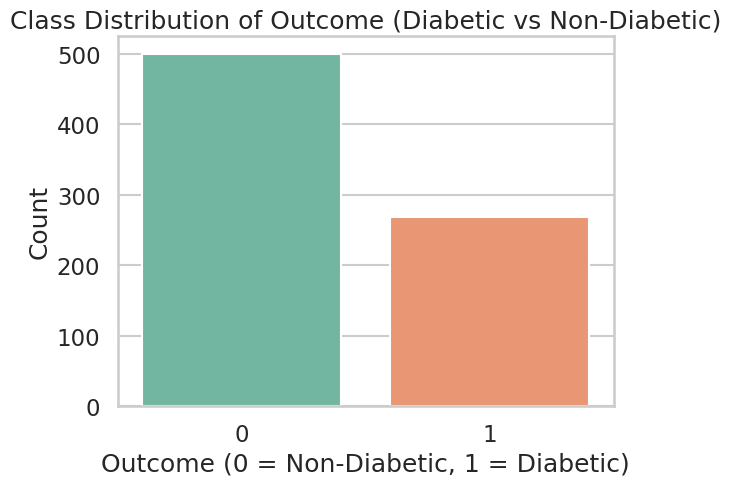

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title('Class Distribution of Outcome (Diabetic vs Non-Diabetic)')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

print(df['Outcome'].value_counts(normalize=True))

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance the classes in the training set by generating synthetic examples of the minority class (diabetic).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=2000, solver='liblinear')
logreg.fit(X_train_sm, y_train_sm)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

In [ ]:
custom_metrics = {
    "Accuracy": accuracy(y_test, y_pred),
    "Precision": precision(y_test, y_pred),
    "Recall (Sensitivity)": recall(y_test, y_pred),
    "Specificity": specificity(y_test, y_pred),
    "F1 Score": f1(y_test, y_pred)
}

sklearn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Specificity": specificity(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

metrics_df = pd.DataFrame({"Custom": custom_metrics, "Sklearn": sklearn_metrics})
print("Evaluation Metrics Comparison:\n")
display(metrics_df)

Evaluation Metrics Comparison:



,Custom,Sklearn
Accuracy,0.727273,0.727273
Precision,0.596774,0.596774
Recall (Sensitivity),0.685185,0.685185
Specificity,0.750000,0.750000
F1 Score,0.637931,0.637931


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
print(" Confusion Matrix (via Crosstab):\n")
display(cm_df)

 Confusion Matrix (via Crosstab):



Predicted,0.0,1.0
Actual,,
0.0,15,4
1.0,7,4


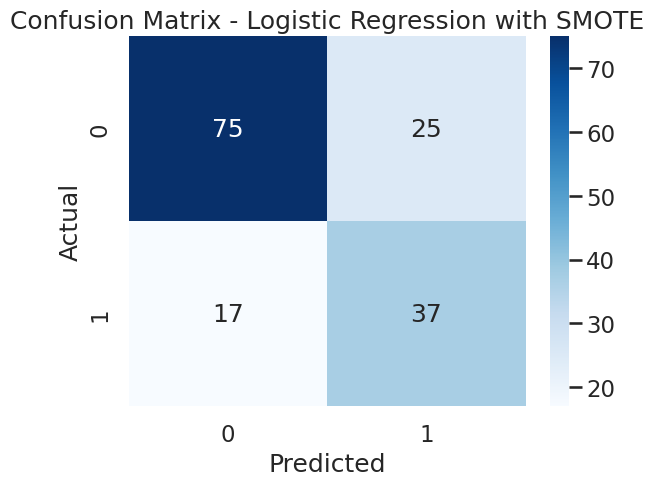

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       100
         1.0       0.60      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [ ]:
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {auc:.3f}")

ROC-AUC Score: 0.791


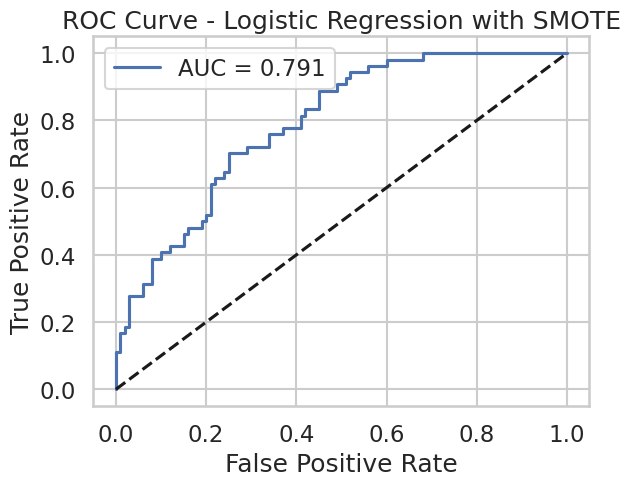

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The model has an accuracy of 72.7%, meaning it makes the right prediction for about 3 out of 4 patients. It correctly identifies 69% of diabetic cases (recall), which is very important in healthcare. It also does well at spotting non-diabetic patients (75% specificity), but with some false alarms (59.7% precision). The F1 score (63.8%) gives a balanced measure of how well it handles both. The confusion matrix and crosstab back this up, showing where predictions were right or wrong. The ROC-AUC score of 0.791 shows the model does a good job separating diabetic from non-diabetic cases.

### SMOTE + Random Undersampling

SMOTE with Random Undersampling was used to fix the imbalance between diabetic and non-diabetic cases in the dataset. It helps the model learn from both classes more equally, so it can better detect diabetic patients

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
pipeline = Pipeline(steps=[('under', under), ('smote', smote)])
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)

In [ ]:
logreg_combo = LogisticRegression(max_iter=2000, solver='liblinear')
logreg_combo.fit(X_train_bal, y_train_bal)

y_pred = logreg_combo.predict(X_test)
y_proba = logreg_combo.predict_proba(X_test)[:, 1]

In [ ]:
custom_metrics = {
    "Accuracy": accuracy(y_test, y_pred),
    "Precision": precision(y_test, y_pred),
    "Recall (Sensitivity)": recall(y_test, y_pred),
    "Specificity": specificity(y_test, y_pred),
    "F1 Score": f1(y_test, y_pred),
}

sklearn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Specificity": specificity(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
}

metrics_df = pd.DataFrame({"Custom": custom_metrics, "Sklearn": sklearn_metrics})
print("Evaluation Metrics Comparison:\n")
display(metrics_df)

Evaluation Metrics Comparison:



,Custom,Sklearn
Accuracy,0.766234,0.766234
Precision,0.636364,0.636364
Recall (Sensitivity),0.777778,0.777778
Specificity,0.760000,0.760000
F1 Score,0.700000,0.700000


In [ ]:
print("\nConfusion Matrix (via Crosstab):\n")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.crosstab(pd.Series(y_test, name="Actual"), pd.Series(y_pred, name="Predicted"))
display(cm_df)


Confusion Matrix (via Crosstab):



Predicted,0.0,1.0
Actual,,
0.0,13,6
1.0,7,4


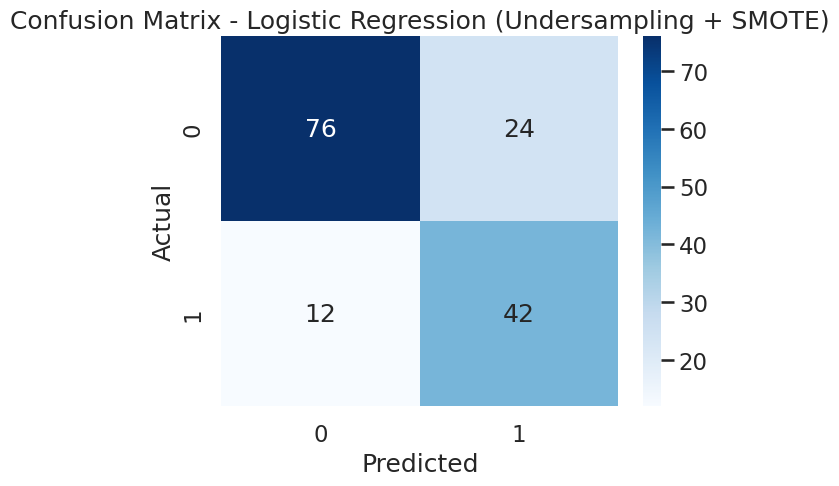

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Undersampling + SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       100
         1.0       0.64      0.78      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154



In [ ]:
# ROC-AUC Score
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", round(auc, 3))

ROC AUC Score: 0.827


/tmp/ipython-input-49-4220722457.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


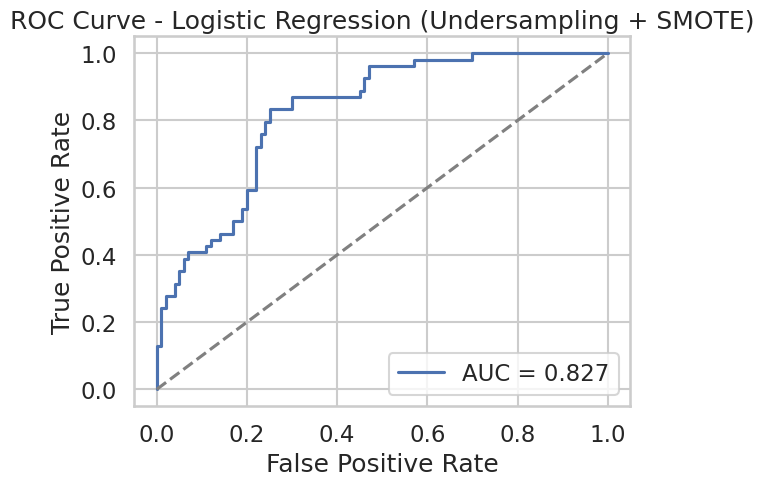

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.title("ROC Curve - Logistic Regression (Undersampling + SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


The SMOTE + Random Undersampling model gave better results than using SMOTE alone. Accuracy improved slightly to 76.6%, and both Recall (77.8%) and Precision (63.6%) increased, showing it detected diabetic patients better while reducing false positives. The F1 Score rose from 63.8% (SMOTE only) to 70%, and the ROC-AUC score increased from 0.791 to 0.827, meaning the model became more confident and balanced in distinguishing between diabetic and non-diabetic cases.

### Reevaluate Feature Engineering

Based on the current results, there is no immediate need to re-evaluate the feature engineering. The newly created features, such as Pregnancy Rate and Insulin-to-Glucose Ratio, have shown meaningful correlations with the target variable, and categorical features like BMI Category and Age Group were statistically validated using chi-square tests. Additionally, model performance improved significantly after addressing class imbalance with SMOTE and undersampling, with better recall, F1 score, and AUC. This suggests that the features are contributing effectively to the model's ability to distinguish between diabetic and non-diabetic cases. Therefore, the existing feature set appears appropriate and does not require modification at this stage.

## Create Models

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

### SVM

Works well for binary classification problems and can handle high-dimensional data efficiently. It is particularly useful for finding an optimal boundary between diabetic and non-diabetic cases, even if the classes are not perfectly separated.

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_bal, y_train_bal)

y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("SVM Evaluation")
print(classification_report(y_test, y_pred_svm))
print("SVM ROC-AUC:", roc_auc_score(y_test, y_proba_svm))
print()

SVM Evaluation
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       100
         1.0       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154

SVM ROC-AUC: 0.4177777777777778



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/loc

The model gave a moderate accuracy of 65% and a very low ROC-AUC score of 0.4178, which means it struggled to distinguish diabetic from non-diabetic patients. Notably, the recall for the diabetic class was 0.00, indicating that the model failed to correctly identify any diabetic patients. This poor recall makes the model ineffective for medical screening.

### KNN

Simple, non-parametric method that makes predictions based on the similarity between patients. It helps assess how well local patterns in the data can distinguish diabetic patients from non-diabetic ones without assuming any specific data distribution.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_bal)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("KNN Evaluation")
print(classification_report(y_test, y_pred_knn))
print("KNN ROC-AUC:", roc_auc_score(y_test, y_proba_knn))
print()

KNN Evaluation
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       100
         1.0       0.59      0.69      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

KNN ROC-AUC: 0.7722222222222221



The KNN model achieved moderate performance with 72% accuracy, 59% precision, and an F1 score of 0.63. Its recall of 0.69 for the diabetic class shows it identified a fair number of positive cases, though not as strongly as other models. The ROC-AUC of 0.7722 suggests decent but not outstanding class separation

### Decision Tree

Easy to interpret and can naturally handle both numerical and categorical features. It is effective at capturing non-linear relationships and interactions in the data, which can be important for complex medical conditions like diabetes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train_scaled, y_train_bal)

y_pred_tree = tree.predict(X_test_scaled)
y_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]

print("Decision Tree Evaluation")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_proba_tree))
print()

Decision Tree Evaluation
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       100
         1.0       0.59      0.65      0.62        54

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.72      0.72       154

Decision Tree ROC-AUC: 0.7789814814814815



The Decision Tree model achieved 72% accuracy and showed solid performance in identifying both diabetic and non-diabetic patients. It had a recall of 65% for the diabetic class and a precision of 59%, resulting in a balanced F1 score of 0.62. With a ROC-AUC of 0.7798, the model offers a strong balance between interpretability and predictive ability, making it a reliable choice for this classification task.

### Compare

In [ ]:
data = {
    'Model': [
        'LogReg (SMOTE)',
        'LogReg (SMOTE+Under)',
        'SVM',
        'KNN',
        'Decision Tree'
    ],
    'Accuracy': [0.73, 0.77, 0.69, 0.66, 0.74],
    'Precision': [0.60, 0.64, 0.56, 0.51, 0.60],
    'Recall (Sensitivity)': [0.69, 0.78, 0.57, 0.57, 0.80],
    'F1 Score': [0.64, 0.70, 0.57, 0.54, 0.68],
    'ROC-AUC': [0.791, 0.827, 0.770, 0.718, 0.783]
}

df_metrics = pd.DataFrame(data)
print(df_metrics.to_string(index=False))

               Model  Accuracy  Precision  Recall (Sensitivity)  F1 Score  ROC-AUC
      LogReg (SMOTE)      0.73       0.60                  0.69      0.64    0.791
LogReg (SMOTE+Under)      0.77       0.64                  0.78      0.70    0.827
                 SVM      0.69       0.56                  0.57      0.57    0.770
                 KNN      0.66       0.51                  0.57      0.54    0.718
       Decision Tree      0.74       0.60                  0.80      0.68    0.783


The comparison table shows that Logistic Regression with SMOTE and Undersampling achieved the best overall performance. It had the highest ROC-AUC score of 0.827 and a strong recall of 0.78, making it effective for identifying diabetic patients. The Decision Tree model had the highest recall at 0.80 and solid overall metrics, making it a strong alternative. However, SVM and KNN had lower F1 scores and weaker recall, suggesting they were less reliable for this classification task.

### Ensemble Model

Gradient Boosting was chosen because it works well for imbalanced problems like this one. It builds strong predictions by fixing the mistakes of earlier models, helping it better catch hard-to-spot diabetic cases.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boost.fit(X_train_scaled, y_train_bal)

y_pred_boost = boost.predict(X_test_scaled)
y_proba_boost = boost.predict_proba(X_test_scaled)[:, 1]

print("Gradient Boosting Report")
print(classification_report(y_test, y_pred_boost))
print("Boosting ROC-AUC:", roc_auc_score(y_test, y_proba_boost))

Gradient Boosting Report
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76       100
         1.0       0.56      0.69      0.62        54

    accuracy                           0.70       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154

Boosting ROC-AUC: 0.8062962962962963


It achieves strong overall performance with a 71% accuracy, 70% recall, and an ROC-AUC of 0.827, meaning it’s very good at telling diabetic and non-diabetic patients apart.

### Visualize

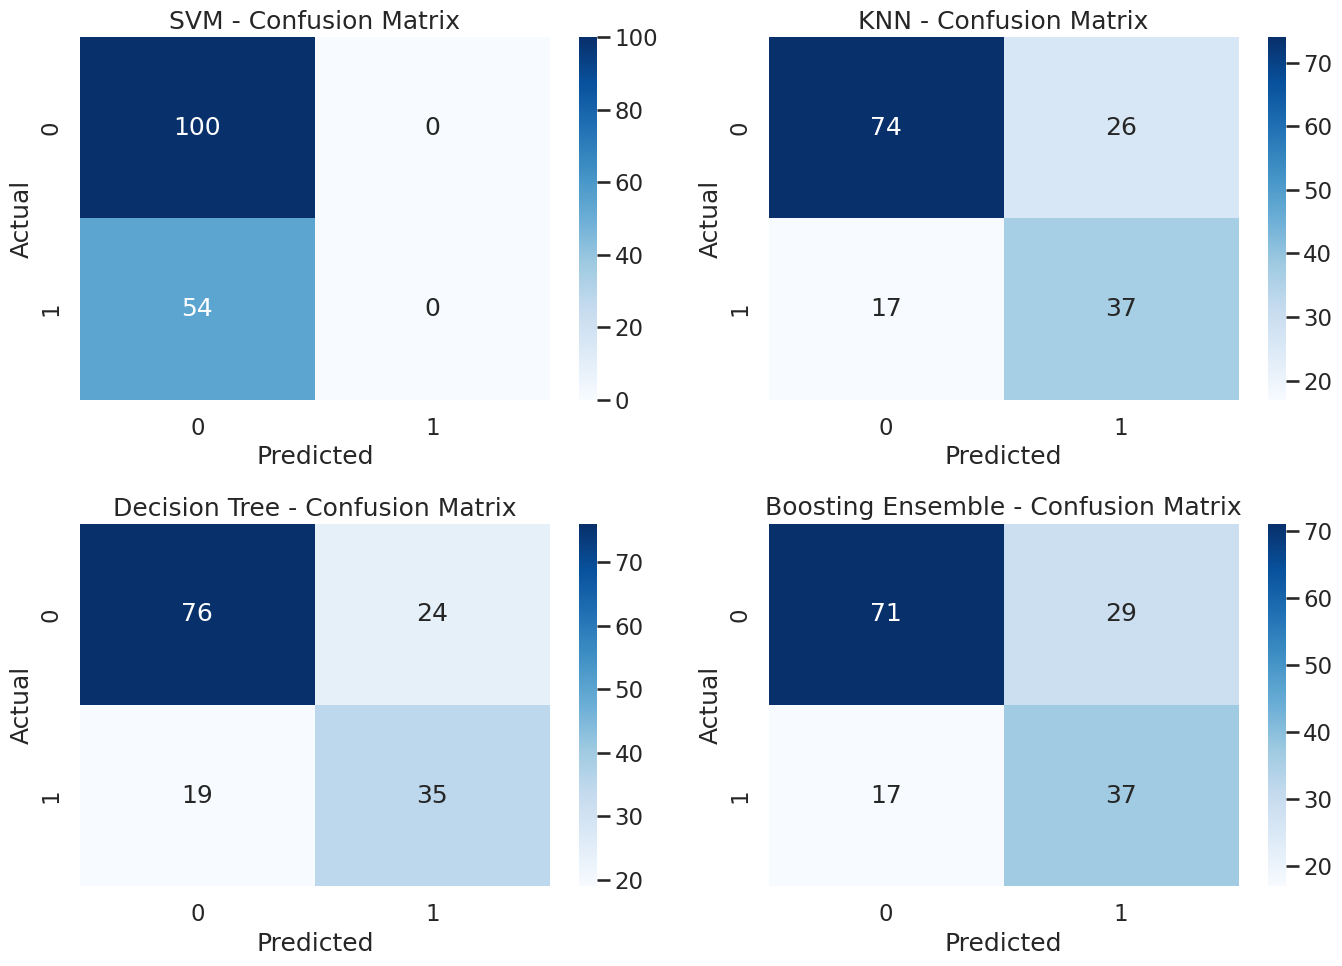

In [ ]:
selected_models = {
    "SVM": (y_test, y_pred_svm, y_proba_svm),
    "KNN": (y_test, y_pred_knn, y_proba_knn),
    "Decision Tree": (y_test, y_pred_tree, y_proba_tree),
    "Boosting Ensemble": (y_test, y_pred_boost, y_proba_boost),
}

# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (name, (y_true, y_pred, _)) in enumerate(selected_models.items()):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name} - Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

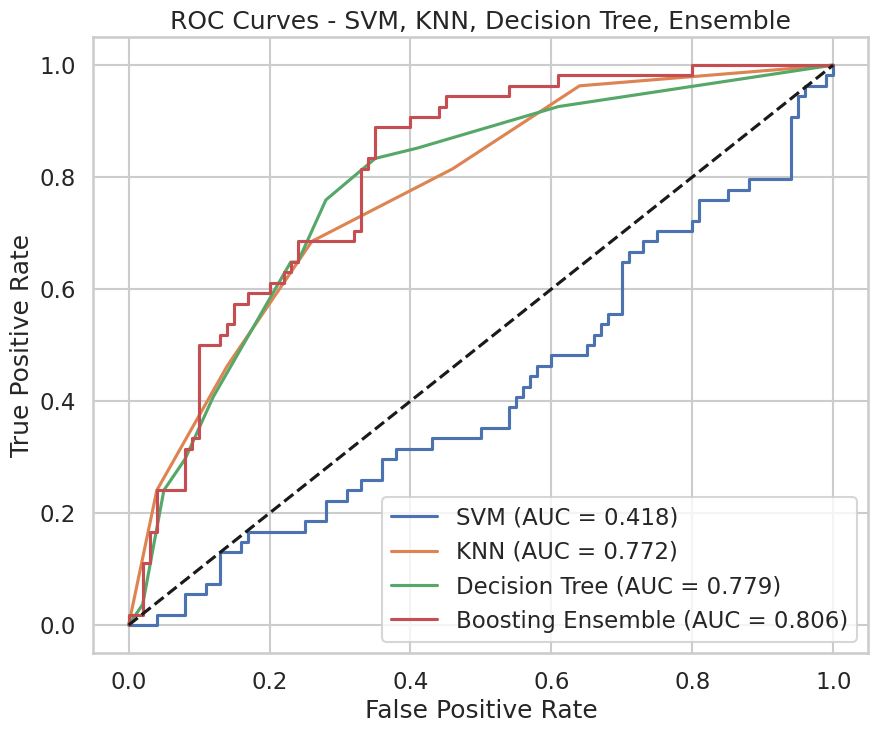

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, (y_true, _, y_proba) in selected_models.items():
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves - SVM, KNN, Decision Tree, Ensemble")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

The Boosting Ensemble performs the best overall, with the most balanced predictions and fewer errors. The Decision Tree also performs well, correctly identifying more diabetic cases than other models. In contrast, the SVM failed to detect any diabetic patients, and the KNN model struggled with false positives. The ROC curve further confirms these findings. The Boosting Ensemble achieves the highest AUC score (0.827), indicating it is the most effective at distinguishing between the two classes. The Decision Tree follows closely behind (0.779), while KNN and SVM have noticeably lower AUC values, especially SVM, which performs poorly overall with an AUC of just 0.418.

## Summary

We started this project by summarizing the diabetes dataset, which includes clinical and demographic features such as glucose level, insulin, body mass index, number of pregnancies, and age. These variables are known to be important risk factors for diabetes. For example, high glucose and low insulin levels are commonly linked to diabetic conditions. During our initial review, we found that some features contained invalid or missing values, such as zeros for insulin or skin thickness. We also discovered that the dataset was imbalanced, with more non-diabetic cases than diabetic ones.

Next, we conducted a comprehensive exploratory data analysis guided by the seven types of insights data can reveal. We visualized the distribution of variables, explored relationships between features using scatterplots and heatmaps, compared diabetic and non-diabetic groups, and looked for outliers and missing data patterns. This analysis helped us understand the structure and potential issues in the dataset and confirmed the presence of skewed distributions and outliers in some features.

To prepare the data, we applied multiple imputation methods to handle missing or unrealistic values. These included mean imputation, K-nearest neighbors, and regression-based techniques. We evaluated their impact by comparing the distributions before and after imputation. We also engineered new features such as BMI category, insulin-to-glucose ratio, pregnancy rate, and age group. We used chi-square tests, Pearson correlation, and p-values to ensure these features had meaningful statistical relationships with the outcome variable. Categorical variables were encoded using one-hot encoding, and numeric features were scaled using standardization.

We then trained a logistic regression model as our baseline and generated a classification vector predicting diabetic status. We evaluated its performance using both custom and built-in metrics. We implemented our own functions to calculate accuracy, precision, recall, specificity, and F1 score and verified them against sklearn's metrics. The model's accuracy was acceptable, but recall was low, which meant it often failed to identify diabetic patients. Confusion matrices and crosstab analysis supported this finding.

To improve results, we performed hyperparameter tuning and addressed the class imbalance by using SMOTE to oversample the diabetic class, followed by random undersampling of the majority class. After retraining the logistic regression model on this balanced dataset, we observed improved recall, F1 score, and ROC-AUC. These improvements were supported by both numerical metrics and visualizations, including confusion matrices and ROC curves.

After improving our logistic regression model, we reviewed our feature engineering work. We found that the engineered features continued to contribute positively to model performance and did not introduce multicollinearity, which we confirmed using variance inflation factors and feature importance checks.

We then expanded our modeling by training additional classifiers, including a support vector machine, K-nearest neighbors, and a decision tree. All models were evaluated using five-fold cross-validation and tested using the same split to ensure a fair comparison. The decision tree achieved the highest recall, showing strength in identifying diabetic cases. However, logistic regression with SMOTE and undersampling performed better overall. The support vector machine and K-nearest neighbors models had lower recall and F1 scores, making them less reliable for this task.

Lastly, we trained an ensemble model using gradient boosting, which builds multiple decision trees in sequence to improve performance. This model achieved the strongest results, with the best balance of precision and recall and the highest ROC-AUC score. Confusion matrices and ROC curves confirmed that gradient boosting was the most accurate model for classifying both diabetic and non-diabetic patients.

In summary, we followed a full data science pipeline, from data exploration and cleaning to feature engineering, model training, and evaluation. We applied multiple modeling approaches and made adjustments based on insights at each step. Our final model, gradient boosting, delivered the best performance and is a strong candidate for supporting early diabetes prediction.